In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
diamonds = pd.read_csv('./data/diamondsql.csv')
#diamonds['volume'] = (4/3) * np.pi * diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds['length_width_ratio'] = diamonds['x'] / diamonds['y']
diamonds['width_depth_ratio'] = diamonds['y'] / diamonds['z']
diamonds['symmetry_index'] = (diamonds['x'] * diamonds['y'] * diamonds['z']) / (diamonds['x'] + diamonds['y'] + diamonds['z'])
diamonds['brilliance_index'] = diamonds['carat'] / (diamonds['x'] * diamonds['y'] * diamonds['z'])
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds['cut_score'] = diamonds['cut'].map(cut_score)
diamonds['proportion_index'] = (diamonds['x'] / diamonds['y']) * (diamonds['x'] / diamonds['z'])
diamonds['purity_index'] = (diamonds['clarity'].astype('category').cat.codes + diamonds['color'].astype('category').cat.codes) / 2
diamonds['is_from_dubai'] = np.where(diamonds['city'] == 'Dubai', 1, 0)
diamonds['overall_quality'] = diamonds[['symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index', 'purity_index']].mean(axis=1)

diamonds

index_id  price  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   4268   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...    505   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   2686   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...    738   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   4882   
...                                                  ...    ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...  10070   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...  12615   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   5457   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...    456   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   6232   

                                                 city_id  carat  \
0      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.21   
1      89c7286890f7347ab235234e74d406596a127ae3679042...   0.32   
2      2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...   0.71   
3      89c7286890f7347ab235234e74d406596a127ae3679042...   0.41   
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02   
...                                                  ...    ...   
40450  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.34   
40451  e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...   2.02   
40452  89c7286890f7347ab235234e74d406596a127ae3679042...   1.01   
40453  89c7286890f7347ab235234e74d406596a127ae3679042...   0.33   
40454  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   1.24   

                                               city_id.1       city  \
0      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...      Dubai   
1      89c7286890f7347ab235234e74d406596a127ae3679042...   Kimberly   
2      2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...  Las Vegas   
3      89c7286890f7347ab235234e74d406596a127ae3679042...   Kimberly   
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...      Dubai   
...                                                  ...        ...   
40450  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...    Antwerp   
40451  e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...     Madrid   
40452  89c7286890f7347ab235234e74d406596a127ae3679042...   Kimberly   
40453  89c7286890f7347ab235234e74d406596a127ae3679042...   Kimberly   
40454  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...     London   

                                              index_id.1  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   
...                                                  ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   

                                                  cut_id  \
0      de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
2      f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...   
3      c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
4      4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
...                                                  ...   
40450  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40451  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40452  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40453  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40454  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id  \
0      6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      44bd7ae60f478fae

In [3]:
diamonds.columns

Index(['index_id', 'price', 'city_id', 'carat', 'city_id.1', 'city',
       'index_id.1', 'cut_id', 'color_id', 'clarity_id', 'cut_id.1', 'cut',
       'clarity_id.1', 'clarity', 'color_id.1', 'color', 'index_id.2', 'depth',
       'table', 'x', 'y', 'z', 'length_width_ratio', 'width_depth_ratio',
       'symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index',
       'purity_index', 'is_from_dubai', 'overall_quality'],
      dtype='object')

In [4]:
diamonds = diamonds.drop(['index_id',
                          'city_id', 
                          'city_id.1',
                          'index_id.1',
                          'cut_id',
                          'color_id',
                          'clarity_id',
                          'cut_id.1',
                          'clarity_id.1',
                          'color_id.1',
                          'index_id.2',
#                          'length_width_ratio',
#                          'width_depth_ratio',
                          'symmetry_index',
                         'brilliance_index',
                          'cut_score',
                          'proportion_index',
#                          'purity_index',
#                          'is_from_dubai'
                         ], axis = 1)

In [5]:
diamonds.head()

price  carat       city        cut clarity color  depth  table     x     y  \
0   4268   1.21      Dubai    Premium     VS2     J   62.4   58.0  6.83  6.79   
1    505   0.32   Kimberly  Very Good     VS2     H   63.0   57.0  4.35  4.38   
2   2686   0.71  Las Vegas       Fair     VS1     G   65.5   55.0  5.62  5.53   
3    738   0.41   Kimberly       Good     SI1     D   63.8   56.0  4.68  4.72   
4   4882   1.02      Dubai      Ideal     SI1     G   60.5   59.0  6.55  6.51   

      z  length_width_ratio  width_depth_ratio  purity_index  is_from_dubai  \
0  4.25            1.005891           1.597647           5.5              1   
1  2.75            0.993151           1.592727           4.5              0   
2  3.65            1.016275           1.515068           3.5              0   
3  3.00            0.991525           1.573333           1.0              0   
4  3.95            1.006144           1.648101           2.5              1   

   overall_quality  
0         4.430428  
1         2.728236  
2         2.747140  
3         1.979445  
4         3.815259

In [6]:
label_encoder = LabelEncoder()

In [7]:
columns_to_encode = ['city','cut','clarity','color']

In [8]:
diamonds_encoded = diamonds.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded[column] = label_encoder.fit_transform(diamonds[column])

In [9]:
diamonds_encoded.head()

price  carat  city  cut  clarity  color  depth  table     x     y     z  \
0   4268   1.21     2    3        5      6   62.4   58.0  6.83  6.79  4.25   
1    505   0.32     3    4        5      4   63.0   57.0  4.35  4.38  2.75   
2   2686   0.71     4    0        4      3   65.5   55.0  5.62  5.53  3.65   
3    738   0.41     3    1        2      0   63.8   56.0  4.68  4.72  3.00   
4   4882   1.02     2    2        2      3   60.5   59.0  6.55  6.51  3.95   

   length_width_ratio  width_depth_ratio  purity_index  is_from_dubai  \
0            1.005891           1.597647           5.5              1   
1            0.993151           1.592727           4.5              0   
2            1.016275           1.515068           3.5              0   
3            0.991525           1.573333           1.0              0   
4            1.006144           1.648101           2.5              1   

   overall_quality  
0         4.430428  
1         2.728236  
2         2.747140  
3         1.979445  
4         3.815259

In [10]:
list_correlacion = diamonds_encoded.columns.tolist()

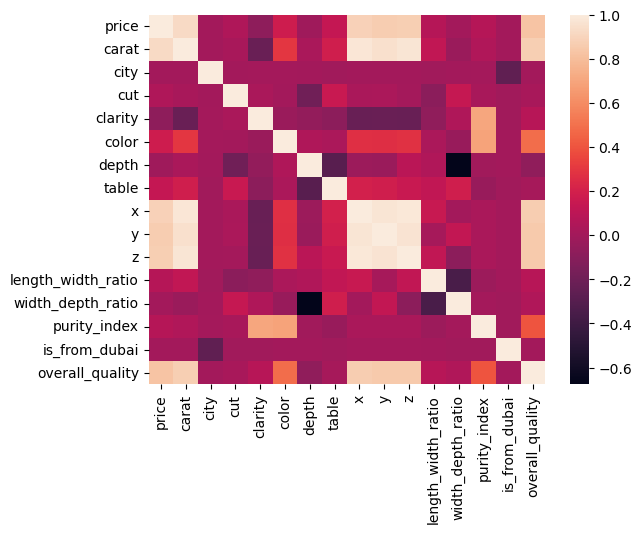

In [11]:
df_correlacion = diamonds_encoded[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [12]:
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

In [13]:
X.head()

carat  city  cut  clarity  color  depth  table     x     y     z  \
0   1.21     2    3        5      6   62.4   58.0  6.83  6.79  4.25   
1   0.32     3    4        5      4   63.0   57.0  4.35  4.38  2.75   
2   0.71     4    0        4      3   65.5   55.0  5.62  5.53  3.65   
3   0.41     3    1        2      0   63.8   56.0  4.68  4.72  3.00   
4   1.02     2    2        2      3   60.5   59.0  6.55  6.51  3.95   

   length_width_ratio  width_depth_ratio  purity_index  is_from_dubai  \
0            1.005891           1.597647           5.5              1   
1            0.993151           1.592727           4.5              0   
2            1.016275           1.515068           3.5              0   
3            0.991525           1.573333           1.0              0   
4            1.006144           1.648101           2.5              1   

   overall_quality  
0         4.430428  
1         2.728236  
2         2.747140  
3         1.979445  
4         3.815259

In [14]:
"""X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
"""

X_train: (32364, 15), X_test: (8091, 15), y_train: (32364,), y_test: (8091,)


In [315]:
"""model_xgb = XGBRegressor(colsample_bytree = 0.95,
                          gamma = 0.14,
                          learning_rate = 0.012,
                          max_depth = 7,
                          missing = np.inf,
                          n_estimators = 1130,
                          subsample = 0.8, 
                         objective='reg:squarederror', random_state=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)"""

In [23]:
model_xgb = XGBRegressor(missing=np.inf)
param_grid = {
    'n_estimators': [100, 2000],
    'gamma' : [0.1, 0.14],
    'subsample' : [0.8],
    'learning_rate' : [0.005, 0.012],
    'colsample_bytree' : [0.80, 0.90],
    'max_depth': [7],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
}
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=3, scoring='neg_root_mean_squared_error')
# Fit the GridSearchCV instance to the training data
grid_search.fit(X, y)
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print("Best parameters found: ", best_params)
print("Best score found: ", best_score)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


C:\Users\piece\miniconda3\envs\sklearn_env\lib\site-packages\xgboost\core.py:160: UserWarning: [18:13:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 2000, 'subsample': 0.8}
Best score found:  -536.4180030152971


In [316]:
mean_squared_error(y_test, y_pred)


281484.353239172

In [317]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

530.5509902348426

In [52]:
diamonds_test = pd.read_csv('./data/diamonds_test.csv')
#diamonds_test['volume'] = (4/3) * np.pi * diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']
diamonds_test['length_width_ratio'] = diamonds_test['x'] / diamonds_test['y']
diamonds_test['width_depth_ratio'] = diamonds_test['y'] / diamonds_test['z']
diamonds_test['symmetry_index'] = (diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z']) / (diamonds_test['x'] + diamonds_test['y'] + diamonds_test['z'])
diamonds_test['brilliance_index'] = diamonds_test['carat'] / (diamonds_test['x'] * diamonds_test['y'] * diamonds_test['z'])
cut_score = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds_test['cut_score'] = diamonds_test['cut'].map(cut_score)
diamonds_test['proportion_index'] = (diamonds_test['x'] / diamonds_test['y']) * (diamonds_test['x'] / diamonds_test['z'])
diamonds_test['purity_index'] = (diamonds_test['clarity'].astype('category').cat.codes + diamonds_test['color'].astype('category').cat.codes) / 2
diamonds_test['is_from_dubai'] = np.where(diamonds_test['city'] == 'Dubai', 1, 0)
diamonds_test['overall_quality'] = diamonds_test[['symmetry_index', 'brilliance_index', 'cut_score', 'proportion_index', 'purity_index']].mean(axis=1)

diamonds_test

id  carat        cut color clarity  depth  table     x     y     z  \
0          0   0.79  Very Good     F     SI1   62.7   60.0  5.82  5.89  3.67   
1          1   1.20      Ideal     J     VS1   61.0   57.0  6.81  6.89  4.18   
2          2   1.57    Premium     H     SI1   62.2   61.0  7.38  7.32  4.57   
3          3   0.90  Very Good     F     SI1   63.8   54.0  6.09  6.13  3.90   
4          4   0.50  Very Good     F     VS1   62.9   58.0  5.05  5.09  3.19   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
13480  13480   0.57      Ideal     E     SI1   61.9   56.0  5.35  5.32  3.30   
13481  13481   0.71      Ideal     I     VS2   62.2   55.0  5.71  5.73  3.56   
13482  13482   0.70      Ideal     F     VS1   61.6   55.0  5.75  5.71  3.53   
13483  13483   0.70  Very Good     F     SI2   58.8   57.0  5.85  5.89  3.45   
13484  13484   0.40      Ideal     I    VVS2   62.4   55.0  4.70  4.73  2.94   

                city  length_width_ratio  width_depth_ratio  symmetry_index  \
0          Amsterdam            0.988115           1.604905        8.179900   
1              Surat            0.988389           1.648325       10.969204   
2           Kimberly            1.008197           1.601751       12.811557   
3           Kimberly            0.993475           1.571795        9.031863   
4          Amsterdam            0.992141           1.595611        6.151339   
...              ...                 ...                ...             ...   
13480      Amsterdam            1.005639           1.612121        6.723307   
13481  New York City            0.996510           1.609551        7.765143   
13482       Tel Aviv            1.007005           1.617564        7.731736   
13483          Surat            0.993209           1.707246        7.825867   
13484  New York City            0.993658           1.608844        5.283681   

       brilliance_index  cut_score  proportion_index  purity_index  \
0              0.006279          3          1.566984           2.0   
1              0.006118          5          1.610270           5.0   
2              0.006359          4          1.628116           3.0   
3              0.006182          3          1.551349           2.0   
4              0.006098          3          1.570631           3.0   
...                 ...        ...               ...           ...   
13480          0.006069          5          1.630354           1.5   
13481          0.006096          5          1.598334           5.0   
13482          0.006040          5          1.640306           3.0   
13483          0.005889          3          1.684137           2.5   
13484          0.006120          5          1.588500           6.0   

       is_from_dubai  overall_quality  
0                  0         2.950633  
1                  0         4.517118  
2                  0         4.289207  
3                  0         3.117879  
4                  0         2.745614  
...              ...              ...  
13480              0         2.971946  
13481              0         3.873915  
13482              0         3.475616  
13483              0         3.003179  
13484              0         3.575660  

[13485 rows x 20 columns]

In [53]:
columns_to_encode = ['city','cut','clarity','color']

In [54]:
diamonds_test

id  carat        cut color clarity  depth  table     x     y     z  \
0          0   0.79  Very Good     F     SI1   62.7   60.0  5.82  5.89  3.67   
1          1   1.20      Ideal     J     VS1   61.0   57.0  6.81  6.89  4.18   
2          2   1.57    Premium     H     SI1   62.2   61.0  7.38  7.32  4.57   
3          3   0.90  Very Good     F     SI1   63.8   54.0  6.09  6.13  3.90   
4          4   0.50  Very Good     F     VS1   62.9   58.0  5.05  5.09  3.19   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
13480  13480   0.57      Ideal     E     SI1   61.9   56.0  5.35  5.32  3.30   
13481  13481   0.71      Ideal     I     VS2   62.2   55.0  5.71  5.73  3.56   
13482  13482   0.70      Ideal     F     VS1   61.6   55.0  5.75  5.71  3.53   
13483  13483   0.70  Very Good     F     SI2   58.8   57.0  5.85  5.89  3.45   
13484  13484   0.40      Ideal     I    VVS2   62.4   55.0  4.70  4.73  2.94   

                city  length_width_ratio  width_depth_ratio  symmetry_index  \
0          Amsterdam            0.988115           1.604905        8.179900   
1              Surat            0.988389           1.648325       10.969204   
2           Kimberly            1.008197           1.601751       12.811557   
3           Kimberly            0.993475           1.571795        9.031863   
4          Amsterdam            0.992141           1.595611        6.151339   
...              ...                 ...                ...             ...   
13480      Amsterdam            1.005639           1.612121        6.723307   
13481  New York City            0.996510           1.609551        7.765143   
13482       Tel Aviv            1.007005           1.617564        7.731736   
13483          Surat            0.993209           1.707246        7.825867   
13484  New York City            0.993658           1.608844        5.283681   

       brilliance_index  cut_score  proportion_index  purity_index  \
0              0.006279          3          1.566984           2.0   
1              0.006118          5          1.610270           5.0   
2              0.006359          4          1.628116           3.0   
3              0.006182          3          1.551349           2.0   
4              0.006098          3          1.570631           3.0   
...                 ...        ...               ...           ...   
13480          0.006069          5          1.630354           1.5   
13481          0.006096          5          1.598334           5.0   
13482          0.006040          5          1.640306           3.0   
13483          0.005889          3          1.684137           2.5   
13484          0.006120          5          1.588500           6.0   

       is_from_dubai  overall_quality  
0                  0         2.950633  
1                  0         4.517118  
2                  0         4.289207  
3                  0         3.117879  
4                  0         2.745614  
...              ...              ...  
13480              0         2.971946  
13481              0         3.873915  
13482              0         3.475616  
13483              0         3.003179  
13484              0         3.575660  

[13485 rows x 20 columns]

In [55]:
diamonds_encoded_test = diamonds_test.copy()  # Hacemos una copia del DataFrame original para no modificarlo directamente
for column in columns_to_encode:
    diamonds_encoded_test[column] = label_encoder.fit_transform(diamonds_test[column])

In [56]:
diamonds_encoded_test

id  carat  cut  color  clarity  depth  table     x     y     z  \
0          0   0.79    4      2        2   62.7   60.0  5.82  5.89  3.67   
1          1   1.20    2      6        4   61.0   57.0  6.81  6.89  4.18   
2          2   1.57    3      4        2   62.2   61.0  7.38  7.32  4.57   
3          3   0.90    4      2        2   63.8   54.0  6.09  6.13  3.90   
4          4   0.50    4      2        4   62.9   58.0  5.05  5.09  3.19   
...      ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
13480  13480   0.57    2      1        2   61.9   56.0  5.35  5.32  3.30   
13481  13481   0.71    2      5        5   62.2   55.0  5.71  5.73  3.56   
13482  13482   0.70    2      2        4   61.6   55.0  5.75  5.71  3.53   
13483  13483   0.70    4      2        3   58.8   57.0  5.85  5.89  3.45   
13484  13484   0.40    2      5        7   62.4   55.0  4.70  4.73  2.94   

       city  length_width_ratio  width_depth_ratio  symmetry_index  \
0         0            0.988115           1.604905        8.179900   
1        10            0.988389           1.648325       10.969204   
2         3            1.008197           1.601751       12.811557   
3         3            0.993475           1.571795        9.031863   
4         0            0.992141           1.595611        6.151339   
...     ...                 ...                ...             ...   
13480     0            1.005639           1.612121        6.723307   
13481     8            0.996510           1.609551        7.765143   
13482    11            1.007005           1.617564        7.731736   
13483    10            0.993209           1.707246        7.825867   
13484     8            0.993658           1.608844        5.283681   

       brilliance_index  cut_score  proportion_index  purity_index  \
0              0.006279          3          1.566984           2.0   
1              0.006118          5          1.610270           5.0   
2              0.006359          4          1.628116           3.0   
3              0.006182          3          1.551349           2.0   
4              0.006098          3          1.570631           3.0   
...                 ...        ...               ...           ...   
13480          0.006069          5          1.630354           1.5   
13481          0.006096          5          1.598334           5.0   
13482          0.006040          5          1.640306           3.0   
13483          0.005889          3          1.684137           2.5   
13484          0.006120          5          1.588500           6.0   

       is_from_dubai  overall_quality  
0                  0         2.950633  
1                  0         4.517118  
2                  0         4.289207  
3                  0         3.117879  
4                  0         2.745614  
...              ...              ...  
13480              0         2.971946  
13481              0         3.873915  
13482              0         3.475616  
13483              0         3.003179  
13484              0         3.575660  

[13485 rows x 20 columns]

In [57]:
orden = ['carat','city','cut','clarity','color','depth','table','x','y','z','length_width_ratio','width_depth_ratio','purity_index','is_from_dubai','overall_quality']
diamonds_encoded_test = diamonds_encoded_test[orden]
diamonds_encoded_test


carat  city  cut  clarity  color  depth  table     x     y     z  \
0       0.79     0    4        2      2   62.7   60.0  5.82  5.89  3.67   
1       1.20    10    2        4      6   61.0   57.0  6.81  6.89  4.18   
2       1.57     3    3        2      4   62.2   61.0  7.38  7.32  4.57   
3       0.90     3    4        2      2   63.8   54.0  6.09  6.13  3.90   
4       0.50     0    4        4      2   62.9   58.0  5.05  5.09  3.19   
...      ...   ...  ...      ...    ...    ...    ...   ...   ...   ...   
13480   0.57     0    2        2      1   61.9   56.0  5.35  5.32  3.30   
13481   0.71     8    2        5      5   62.2   55.0  5.71  5.73  3.56   
13482   0.70    11    2        4      2   61.6   55.0  5.75  5.71  3.53   
13483   0.70    10    4        3      2   58.8   57.0  5.85  5.89  3.45   
13484   0.40     8    2        7      5   62.4   55.0  4.70  4.73  2.94   

       length_width_ratio  width_depth_ratio  purity_index  is_from_dubai  \
0                0.988115           1.604905           2.0              0   
1                0.988389           1.648325           5.0              0   
2                1.008197           1.601751           3.0              0   
3                0.993475           1.571795           2.0              0   
4                0.992141           1.595611           3.0              0   
...                   ...                ...           ...            ...   
13480            1.005639           1.612121           1.5              0   
13481            0.996510           1.609551           5.0              0   
13482            1.007005           1.617564           3.0              0   
13483            0.993209           1.707246           2.5              0   
13484            0.993658           1.608844           6.0              0   

       overall_quality  
0             2.950633  
1             4.517118  
2             4.289207  
3             3.117879  
4             2.745614  
...                ...  
13480         2.971946  
13481         3.873915  
13482         3.475616  
13483         3.003179  
13484         3.575660  

[13485 rows x 15 columns]

In [58]:
#X_prueba = diamonds_encoded_test.drop('id', axis=1)
X_prueba = diamonds_encoded_test

In [59]:
X_prueba

carat  city  cut  clarity  color  depth  table     x     y     z  \
0       0.79     0    4        2      2   62.7   60.0  5.82  5.89  3.67   
1       1.20    10    2        4      6   61.0   57.0  6.81  6.89  4.18   
2       1.57     3    3        2      4   62.2   61.0  7.38  7.32  4.57   
3       0.90     3    4        2      2   63.8   54.0  6.09  6.13  3.90   
4       0.50     0    4        4      2   62.9   58.0  5.05  5.09  3.19   
...      ...   ...  ...      ...    ...    ...    ...   ...   ...   ...   
13480   0.57     0    2        2      1   61.9   56.0  5.35  5.32  3.30   
13481   0.71     8    2        5      5   62.2   55.0  5.71  5.73  3.56   
13482   0.70    11    2        4      2   61.6   55.0  5.75  5.71  3.53   
13483   0.70    10    4        3      2   58.8   57.0  5.85  5.89  3.45   
13484   0.40     8    2        7      5   62.4   55.0  4.70  4.73  2.94   

       length_width_ratio  width_depth_ratio  purity_index  is_from_dubai  \
0                0.988115           1.604905           2.0              0   
1                0.988389           1.648325           5.0              0   
2                1.008197           1.601751           3.0              0   
3                0.993475           1.571795           2.0              0   
4                0.992141           1.595611           3.0              0   
...                   ...                ...           ...            ...   
13480            1.005639           1.612121           1.5              0   
13481            0.996510           1.609551           5.0              0   
13482            1.007005           1.617564           3.0              0   
13483            0.993209           1.707246           2.5              0   
13484            0.993658           1.608844           6.0              0   

       overall_quality  
0             2.950633  
1             4.517118  
2             4.289207  
3             3.117879  
4             2.745614  
...                ...  
13480         2.971946  
13481         3.873915  
13482         3.475616  
13483         3.003179  
13484         3.575660  

[13485 rows x 15 columns]

In [60]:
y_prueba = best_model.predict(X_prueba)

In [61]:
y_prueba


array([2821.3733, 5510.5356, 9515.847 , ..., 3021.2   , 2165.6572,
        813.5917], dtype=float32)

In [62]:
solution = []
for i, value in enumerate(y_prueba):
    solution.append((i,value))
    

In [63]:
solution_df = pd.DataFrame(solution)


In [64]:
solution_df.columns = ['id', 'price']

In [65]:
solution_df['price'].to_csv('solution.csv')